<a href="https://colab.research.google.com/github/somyamangla/SupervisedLearningAlgorithm/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIB, IMPORTING DATASET, DATA PREPROCESSING AND CLEANING, EDA, FEATURE SCALING, TRAI TEST SPLIT, MODEL BUILDING, TRAINING MODEL, PREDICTING RESULT, EVALUATING MODEL, MAKING CONFUSION MATRIX, EVALUATING MODEL- CLASSIFICTION MATRIX

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv('/content/Social_Network_Ads (1).csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.isnull().sum()

User ID            27
Gender             36
Age                30
EstimatedSalary    16
Purchased          11
dtype: int64

DROP THE ROWS WHERE ALL VALUES OF COLUMN ARE NULL

In [ ]:
dataset = dataset.dropna(axis=0, how='all')

In [ ]:
dataset.isnull().sum()

User ID            16
Gender             25
Age                19
EstimatedSalary     5
Purchased           0
dtype: int64

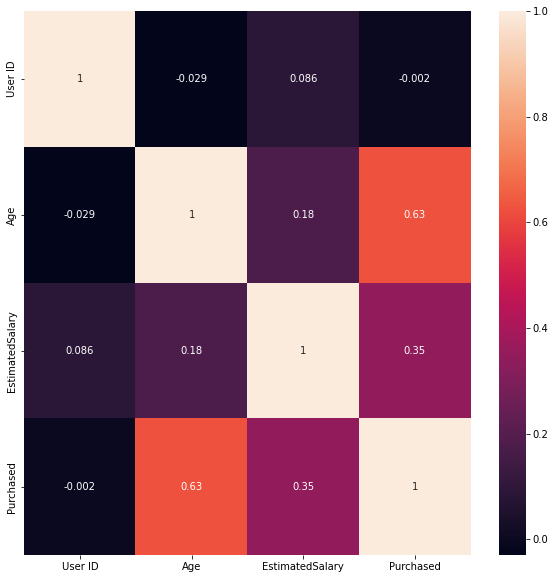

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

Purchased is dependent variable, relation of purchase and user id is very less, so can drop user id

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
gender = pd.get_dummies(dataset.Gender, drop_first=True)

In [ ]:
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [ ]:
df=pd.concat([gender,dataset],axis=1)

In [ ]:
df

,Male,User ID,Gender,Age,EstimatedSalary,Purchased
0,1,15624510.0,Male,19.0,19000.0,0.0
1,1,15810944.0,Male,35.0,20000.0,0.0
2,0,15668575.0,Female,26.0,43000.0,0.0
3,0,15603246.0,Female,27.0,57000.0,0.0
4,1,15804002.0,Male,19.0,76000.0,0.0
...,...,...,...,...,...,...
395,0,15691863.0,Female,46.0,41000.0,1.0
396,1,15706071.0,Male,51.0,23000.0,1.0
397,0,15654296.0,Female,50.0,20000.0,1.0
398,1,15755018.0,Male,36.0,33000.0,0.0


In [ ]:
df.drop(columns='User ID',axis=1,inplace=True)
df.drop(columns='Gender',axis=1,inplace=True)

In [ ]:
df

,Male,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0.0
1,1,35.0,20000.0,0.0
2,0,26.0,43000.0,0.0
3,0,27.0,57000.0,0.0
4,1,19.0,76000.0,0.0
...,...,...,...,...
395,0,46.0,41000.0,1.0
396,1,51.0,23000.0,1.0
397,0,50.0,20000.0,1.0
398,1,36.0,33000.0,0.0


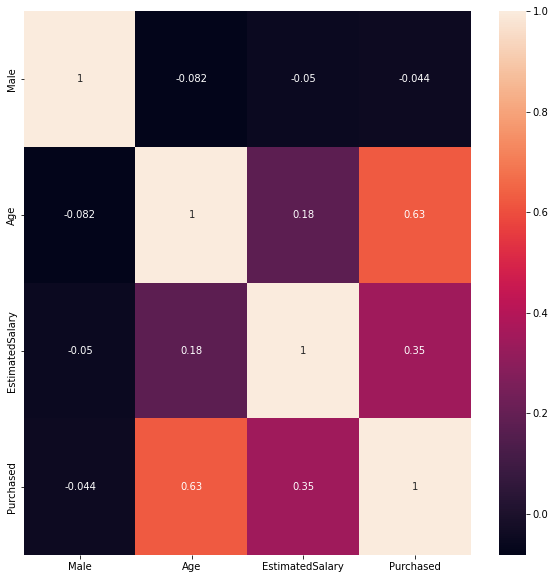

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

So purchase is not that dependent on gender as well so we can drop that or not use in train test data

In [ ]:
df['EstimatedSalary']=df['EstimatedSalary'].fillna(0)

In [ ]:
df['Age']=df['Age'].fillna(method='ffill')

In [ ]:
df.isnull().sum()

Male               0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.drop(columns='Male',axis=1,inplace=True)

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0.0
1,35.0,20000.0,0.0
2,26.0,43000.0,0.0
3,27.0,57000.0,0.0
4,19.0,76000.0,0.0
...,...,...,...
395,46.0,41000.0,1.0
396,51.0,23000.0,1.0
397,50.0,20000.0,1.0
398,36.0,33000.0,0.0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
stanscale = StandardScaler()
x=stanscale.fit_transform(x)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [ ]:
model = SVC(kernel='linear')

In [ ]:
y_train

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [ ]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cn = confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.8076923076923077

In [ ]:
cn

array([[41,  6],
       [ 9, 22]])

CLASSIFICATION MATRIX

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        47
         1.0       0.79      0.71      0.75        31

    accuracy                           0.81        78
   macro avg       0.80      0.79      0.80        78
weighted avg       0.81      0.81      0.81        78

